# TensorFlow进阶

## 合并与分割
### 合并

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
# 模拟成绩册 A
a = tf.random.normal([4,35,8]) 
# 模拟成绩册 B
b = tf.random.normal([6,35,8]) 
# 拼接合并成绩册
tf.concat([a,b],axis=0) 

<tf.Tensor: id=13, shape=(10, 35, 8), dtype=float32, numpy=
array([[[ 5.8873630e-01, -3.4746164e-01,  5.7960927e-01, ...,
         -7.6357228e-01, -4.0988418e-01,  4.6679187e-01],
        [ 1.7340827e+00,  3.6109924e-01,  3.5839298e-01, ...,
         -8.4251952e-01, -9.4862044e-02, -7.7858531e-01],
        [ 3.7536284e-01, -4.4463688e-01, -3.3374853e-03, ...,
          3.1173680e-02,  1.1202271e+00,  5.3370297e-01],
        ...,
        [-1.1978648e+00,  1.4992204e-01,  2.3154202e-01, ...,
         -1.4378194e+00,  5.0423759e-01, -9.6588582e-01],
        [-6.7485356e-01, -5.0350660e-01, -3.1832105e-01, ...,
          1.8675824e-01, -4.4114500e-01, -2.4754806e-01],
        [-1.4981645e+00,  6.0118037e-01,  4.1660586e-01, ...,
          5.3553319e-01,  1.3251185e-01, -1.1279777e+00]],

       [[-7.2804105e-01, -8.7238109e-01,  6.4365840e-01, ...,
         -2.1067724e+00,  6.9023126e-01, -1.4386853e+00],
        [ 1.6172041e+00, -1.6047848e+00,  6.4429432e-01, ...,
          3.0422714e-01

In [3]:
a = tf.random.normal([10,35,4])
b = tf.random.normal([10,35,4])
# 在科目维度上拼接
tf.concat([a,b],axis=2) 

<tf.Tensor: id=27, shape=(10, 35, 8), dtype=float32, numpy=
array([[[-1.7785313 ,  0.44671088,  1.906389  , ...,  0.22660032,
          0.5989278 , -1.3929954 ],
        [-0.44945407, -1.2888883 , -1.3782029 , ..., -0.24018878,
         -1.429324  , -0.4898744 ],
        [-2.222835  ,  1.0280398 , -0.15853332, ...,  2.0460744 ,
         -0.46051008,  0.02343535],
        ...,
        [ 0.3946474 , -0.05992594,  1.2470436 , ..., -0.9170025 ,
         -0.7636802 ,  1.6815629 ],
        [-2.4634213 ,  0.45704913, -0.07572711, ..., -0.7664566 ,
          0.44797653,  0.02748227],
        [ 2.0281813 , -0.3887902 , -0.5272015 , ..., -0.78118384,
          0.01462882,  0.29456648]],

       [[-1.7491972 , -0.9462222 , -0.1576081 , ..., -2.105762  ,
          1.1271304 , -0.32350639],
        [-0.519033  , -0.7018975 , -0.85497713, ...,  0.03053831,
          0.2094574 , -1.687281  ],
        [ 0.84420586,  0.26464254,  0.57411736, ...,  0.13680442,
          0.43753403,  1.3279532 ],
       

In [4]:
a = tf.random.normal([4,32,8])
b = tf.random.normal([6,35,8])
try:
    tf.concat([a,b],axis=0) # 非法拼接，其他维度长度不相同
except Exception as ex:
    print(ex)

ConcatOp : Dimensions of inputs should match: shape[0] = [4,32,8] vs. shape[1] = [6,35,8] [Op:ConcatV2] name: concat


使用 tf.stack(tensors, axis)可以堆叠方式合并多个张量，通过 tensors 列表表示， 参数 axis 指定新维度插入的位置， axis 的用法与 tf.expand_dims 的一致，当axis ≥ 0时，在 axis之前插入； 当axis < 0时，在 axis 之后插入新维度。 

In [5]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
# 堆叠合并为 2 个班级，班级维度插入在最前
tf.stack([a,b],axis=0) 

<tf.Tensor: id=53, shape=(2, 35, 8), dtype=float32, numpy=
array([[[-5.40749133e-01,  1.58083476e-02,  2.94267721e-02,
          3.67177635e-01, -2.37406865e-01, -7.60905445e-01,
         -2.29212499e+00, -7.75705934e-01],
        [ 1.11752838e-01, -1.13514280e+00, -4.84930426e-01,
         -3.44208419e-01,  9.40503716e-01,  1.40077317e+00,
         -5.02934873e-01,  4.10485864e-01],
        [ 5.94958544e-01, -8.87149096e-01,  3.94559056e-01,
          7.21593127e-02,  5.71714282e-01,  1.34427547e+00,
          1.00393152e+00,  5.38403451e-01],
        [ 2.62385875e-01,  5.38515210e-01, -8.00797462e-01,
         -2.32194960e-01,  2.09922695e+00, -4.50407863e-01,
         -7.43777528e-02,  2.00556660e+00],
        [ 7.48052299e-01,  1.38348639e+00, -4.22931910e-01,
         -2.83003956e-01,  6.82974041e-01, -1.79872841e-01,
         -1.32842779e+00, -6.05283856e-01],
        [-1.52707204e-01,  6.91095769e-01, -4.21667188e-01,
         -4.85451579e-01,  9.46290717e-02, -3.31034362e-01,
 

同样可以选择在其他位置插入新维度， 例如， 最末尾插入班级维度:

In [6]:
# 在末尾插入班级维度
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b],axis=-1) 

<tf.Tensor: id=66, shape=(35, 8, 2), dtype=float32, numpy=
array([[[ 0.05329738, -1.5902457 ],
        [ 0.34755418,  1.0161575 ],
        [ 1.1029378 , -1.4891272 ],
        [ 1.1358268 ,  0.2086796 ],
        [-0.06011174, -0.22369973],
        [-0.19199233, -1.6741587 ],
        [-0.6693648 , -1.6227504 ],
        [ 0.14199488,  0.5597819 ]],

       [[-0.3402484 , -0.09277528],
        [-0.10369706, -1.2860553 ],
        [ 1.9067492 ,  0.2987942 ],
        [-0.39461446,  0.700922  ],
        [-1.0737535 ,  1.6325126 ],
        [ 0.12472707, -0.47413707],
        [ 0.942566  ,  1.4239129 ],
        [-1.6954707 , -0.23716962]],

       [[-0.6767195 ,  0.25784308],
        [ 0.07648886,  0.5369944 ],
        [-0.7067332 , -0.35340422],
        [ 0.87172633, -1.1379769 ],
        [-0.38617182, -1.6110011 ],
        [-0.60634166, -0.978938  ],
        [-1.507075  ,  0.6261872 ],
        [ 0.83598757,  0.12538111]],

       [[ 0.76666176, -0.99897456],
        [ 0.97871125,  0.94528997],

In [7]:
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
# 拼接方式合并，没有 2 个班级的概念
tf.concat([a,b],axis=0) 

<tf.Tensor: id=80, shape=(70, 8), dtype=float32, numpy=
array([[-4.62260306e-01,  3.96053374e-01, -6.26502037e-02,
         7.07266748e-01,  2.05548014e-02, -3.07566851e-01,
        -1.14867091e-01,  1.25847912e+00],
       [-3.49050164e-01, -1.66524398e+00,  3.12228411e-01,
        -2.83631999e-02,  1.05168200e+00, -4.17700827e-01,
         1.52536288e-01,  3.58153641e-01],
       [-1.51067242e-01, -1.97077960e-01,  1.06789458e+00,
         7.99158990e-01,  8.65638673e-01,  9.71890613e-03,
        -1.81216943e+00,  5.53519428e-01],
       [ 1.35795414e+00,  1.91918984e-01,  5.08838892e-01,
         3.99554998e-01, -4.55968708e-01, -1.04949391e+00,
         8.36262286e-01, -5.28228700e-01],
       [-1.39828885e+00, -1.42594948e-01,  2.02388540e-01,
         1.17670429e+00, -6.61540568e-01,  1.37689531e-01,
         9.69990432e-01, -3.94727383e-03],
       [ 9.30748880e-01, -2.31615305e+00, -9.48968112e-01,
        -4.75304782e-01, -7.92504847e-01, -5.20290315e-01,
        -2.10015610e-

In [8]:
a = tf.random.normal([35,4])
b = tf.random.normal([35,8])
try:
    # 非法堆叠操作，张量 shape 不相同
    tf.stack([a,b],axis=-1) 
except Exception as ex:
    print(ex)

Shapes of all inputs must match: values[0].shape = [35,4] != values[1].shape = [35,8] [Op:Pack] name: stack


### 分割

In [9]:
x = tf.random.normal([10,35,8])
# 等长切割为 10 份
result = tf.split(x, num_or_size_splits=10, axis=0)
# 返回的列表为 10 个张量的列表
len(result) 

10

In [10]:
 # 查看第一个班级的成绩册张量
result[0]

<tf.Tensor: id=101, shape=(1, 35, 8), dtype=float32, numpy=
array([[[-0.71061176,  0.79658186,  0.05779533,  0.3065339 ,
         -1.5571901 ,  1.304609  ,  1.7410243 , -0.59291756],
        [ 0.5173011 ,  1.1431963 ,  0.07744087, -0.98681974,
         -1.3003352 , -1.0700133 ,  0.2527959 ,  1.6336491 ],
        [ 0.19000381, -0.2586968 , -0.25360337,  0.05912501,
          1.7392615 , -0.36911514,  0.37159327,  0.18109626],
        [-0.78693324,  0.11115628, -0.681242  ,  1.1092469 ,
          1.733427  , -0.06182566,  0.6468332 ,  0.63214767],
        [-0.07541103, -0.3712584 ,  0.41619194,  1.4427589 ,
         -0.6189989 ,  0.4922443 ,  0.12965348, -0.77344453],
        [ 0.2241085 ,  0.8448336 , -0.33020997, -0.10774595,
          0.42799875,  0.7393838 , -0.1254559 ,  0.35778087],
        [-1.0509243 ,  0.62439466, -1.0573416 , -0.3911914 ,
         -0.30571288,  0.13888289, -0.23944423, -1.8241187 ],
        [ 0.02203949, -0.44634575,  0.40847892,  0.62689257,
         -1.115058

In [11]:
x = tf.random.normal([10,35,8])
# 自定义长度的切割，切割为 4 份，返回 4 个张量的列表 result
result = tf.split(x, num_or_size_splits=[4,2,2,2] ,axis=0)
len(result)

4

In [12]:
result[0]

<tf.Tensor: id=119, shape=(4, 35, 8), dtype=float32, numpy=
array([[[-0.51582205,  2.0494723 , -0.8840653 , ..., -0.74907345,
          1.0238028 ,  0.15296724],
        [ 0.85806024, -1.029754  , -1.6307371 , ...,  0.52414346,
         -0.26439312, -0.17763866],
        [ 0.43767044,  0.64068604,  1.9422854 , ..., -0.7948828 ,
         -0.5623937 ,  0.12090406],
        ...,
        [-1.6878669 ,  2.3720915 ,  0.51692224, ..., -1.7110244 ,
          0.83440447,  2.112926  ],
        [-1.9381948 , -0.93184924,  0.12526953, ..., -0.6946057 ,
         -0.8142133 , -1.2913251 ],
        [-0.11407708,  0.9578615 ,  0.30091557, ...,  1.1943645 ,
          0.66494894, -1.1483077 ]],

       [[ 1.8704697 , -1.5103718 , -1.0324745 , ...,  1.6088476 ,
         -1.0951946 ,  0.6290548 ],
        [ 0.60626346,  2.3051264 , -1.1403931 , ...,  0.8318533 ,
         -0.3481026 ,  1.0625865 ],
        [ 0.9622153 ,  0.40345863, -0.96485895, ..., -1.4986656 ,
         -0.4640006 , -1.4966893 ],
       

In [13]:
x = tf.random.normal([10,35,8])
# Unstack 为长度为 1 的张量
result = tf.unstack(x,axis=0) 
# 返回 10 个张量的列表
len(result) 

10

查看切割后的张量的形状：

In [14]:
# 第一个班级
result[0] 

<tf.Tensor: id=129, shape=(35, 8), dtype=float32, numpy=
array([[ 1.20321870e-01,  9.96825755e-01, -5.38338244e-01,
        -3.08420420e-01,  1.98823714e+00,  1.90593636e+00,
        -5.42092383e-01,  7.50393793e-02],
       [-6.24389708e-01,  4.54716206e-01,  5.13056219e-01,
         1.98021084e-01, -1.46376622e+00,  7.09650695e-01,
         3.63261998e-01, -3.06045830e-01],
       [ 1.95489854e-01,  1.57836270e+00, -1.10582625e-02,
         1.34190631e+00, -1.14899099e+00, -1.38217914e+00,
        -6.01495802e-01, -6.82765782e-01],
       [ 5.55417895e-01,  4.23767567e-01, -1.00912786e+00,
        -5.60995221e-01, -3.41505140e-01, -2.84672678e-01,
         1.37264714e-01, -2.66437387e+00],
       [ 1.14534807e+00, -1.45803452e+00,  1.31021726e+00,
         5.29078841e-01, -3.29371810e-01,  2.08497167e+00,
         1.03301001e+00,  2.60946423e-01],
       [ 3.72674853e-01,  1.39539468e+00, -6.51956201e-01,
        -4.81216274e-02,  5.04172623e-01,  1.04484308e+00,
         6.81853712e

## 数据统计
### 向量范数

In [15]:
x = tf.ones([2,2])
# 计算 L1 范数
tf.norm(x,ord=1) 

<tf.Tensor: id=145, shape=(), dtype=float32, numpy=4.0>

In [16]:
# 计算 L2 范数
tf.norm(x,ord=2) 

<tf.Tensor: id=150, shape=(), dtype=float32, numpy=2.0>

In [17]:
import numpy as np
# 计算∞范数
tf.norm(x,ord=np.inf) 

<tf.Tensor: id=154, shape=(), dtype=float32, numpy=1.0>

### 最值、均值、和

In [18]:
# 模型生成概率
x = tf.random.normal([4,10])
# 统计概率维度上的最大值
tf.reduce_max(x,axis=1) 

<tf.Tensor: id=162, shape=(4,), dtype=float32, numpy=array([1.051403 , 1.3850142, 1.135632 , 1.9523605], dtype=float32)>

返回长度为 4 的向量，分别代表了每个样本的最大概率值。 同样求出每个样本概率的最小值，实现如下：

In [19]:
# 统计概率维度上的最小值
tf.reduce_min(x,axis=1) 

<tf.Tensor: id=164, shape=(4,), dtype=float32, numpy=array([-0.39419806, -1.737878  , -0.4118258 , -1.5625464 ], dtype=float32)>

求出每个样本的概率的均值，实现如下：

In [20]:
# 统计概率维度上的均值
tf.reduce_mean(x,axis=1) 

<tf.Tensor: id=166, shape=(4,), dtype=float32, numpy=array([ 0.243161  , -0.12091659,  0.11944889, -0.02008009], dtype=float32)>

当不指定 axis 参数时， tf.reduce_*函数会求解出全局元素的最大、最小、 均值、和等数据，例如：

In [21]:
x = tf.random.normal([4,10])
# 统计全局的最大、最小、均值、和，返回的张量均为标量
tf.reduce_max(x),tf.reduce_min(x),tf.reduce_mean(x)

(<tf.Tensor: id=174, shape=(), dtype=float32, numpy=1.6513593>,
 <tf.Tensor: id=176, shape=(), dtype=float32, numpy=-1.9508023>,
 <tf.Tensor: id=178, shape=(), dtype=float32, numpy=0.05119744>)

在求解误差函数时，通过 TensorFlow 的 MSE 误差函数可以求得每个样本的误差，需要计算样本的平均误差，此时可以通过 tf.reduce_mean 在样本数维度上计算均值

In [22]:
# 模拟网络预测输出
out = tf.random.normal([4,10]) 
# 模拟真实标签
y = tf.constant([1,2,2,0]) 
# one-hot 编码
y = tf.one_hot(y,depth=10) 
# 计算每个样本的误差
loss = keras.losses.mse(y,out)
# 平均误差，在样本数维度上取均值
loss = tf.reduce_mean(loss) 
loss # 误差标量

<tf.Tensor: id=194, shape=(), dtype=float32, numpy=1.051903>

In [23]:
out = tf.random.normal([4,10])
# 求最后一个维度的和
tf.reduce_sum(out,axis=-1)

<tf.Tensor: id=202, shape=(4,), dtype=float32, numpy=array([-1.8025079,  5.792209 ,  0.9623766, -9.07829  ], dtype=float32)>

考虑 10 分类问题，我们得到神经网络的输出张量 out， shape 为[2,10]， 代表了 2 个样本属于 10 个类别的概率， 由于元素的位置索引代表了当前样本属于此类别的概率，预测时往往会选择概率值最大的元素所在的索引号作为样本类别的预测值

In [24]:
out = tf.random.normal([2,10])
# 通过 softmax 函数转换为概率值
out = tf.nn.softmax(out, axis=1) 
out

<tf.Tensor: id=209, shape=(2, 10), dtype=float32, numpy=
array([[0.2822498 , 0.00368797, 0.20614296, 0.06334717, 0.11588178,
        0.05546281, 0.03070444, 0.01920971, 0.15640783, 0.06690557],
       [0.0742564 , 0.13357079, 0.07443476, 0.5149969 , 0.05243919,
        0.05450327, 0.0355561 , 0.01370301, 0.02166766, 0.02487192]],
      dtype=float32)>

通过 tf.argmax(x, axis)和 tf.argmin(x, axis)可以求解在 axis 轴上， x 的最大值、 最小值所在的索引号

In [25]:
pred = tf.argmax(out, axis=1) # 选取概率最大的位置
pred

<tf.Tensor: id=211, shape=(2,), dtype=int64, numpy=array([0, 3], dtype=int64)>

### 张量比较

考虑 100 个样本的预测结果，通过 tf.argmax 获取预测类别

In [26]:
out = tf.random.normal([100,10])
out = tf.nn.softmax(out, axis=1) # 输出转换为概率
pred = tf.argmax(out, axis=1) # 计算预测值
pred

<tf.Tensor: id=220, shape=(100,), dtype=int64, numpy=
array([0, 2, 3, 7, 1, 1, 4, 9, 7, 3, 4, 2, 1, 4, 7, 5, 0, 6, 3, 6, 0, 1,
       1, 8, 5, 0, 3, 8, 6, 2, 7, 0, 4, 9, 6, 9, 5, 4, 9, 1, 8, 6, 8, 4,
       3, 4, 8, 1, 8, 7, 3, 6, 7, 4, 2, 6, 4, 8, 4, 1, 9, 1, 6, 8, 4, 8,
       9, 4, 4, 4, 3, 5, 1, 9, 2, 4, 0, 9, 1, 2, 0, 9, 0, 1, 7, 8, 6, 4,
       8, 7, 9, 4, 2, 9, 2, 8, 8, 6, 1, 6], dtype=int64)>

In [27]:
# 模拟生成真实标签
y = tf.random.uniform([100],dtype=tf.int64,maxval=10)
y

<tf.Tensor: id=224, shape=(100,), dtype=int64, numpy=
array([4, 9, 1, 4, 2, 0, 3, 7, 4, 4, 5, 0, 4, 2, 8, 7, 8, 0, 3, 6, 3, 3,
       5, 8, 9, 7, 7, 4, 8, 0, 4, 4, 3, 2, 8, 4, 8, 7, 1, 9, 0, 6, 9, 6,
       6, 1, 0, 0, 5, 5, 2, 1, 4, 2, 7, 5, 7, 1, 2, 3, 7, 5, 2, 1, 6, 4,
       3, 2, 4, 5, 9, 6, 7, 7, 2, 5, 5, 5, 0, 9, 9, 8, 1, 6, 9, 8, 5, 3,
       1, 3, 7, 6, 8, 5, 1, 7, 8, 4, 0, 1], dtype=int64)>

通过 tf.equal(a, b)(或 tf.math.equal(a,b)，两者等价)函数可以比较这 2 个张量是否相等

In [28]:
# 预测值与真实值比较，返回布尔类型的张量
out = tf.equal(pred,y) 
out

<tf.Tensor: id=225, shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])>

out = tf.cast(out, dtype=tf.float32) # 布尔型转 int 型
correct = tf.reduce_sum(out) # 统计 True 的个数

In [29]:
out = tf.cast(out, dtype=tf.float32) # 布尔型转 int 型
correct = tf.reduce_sum(out) # 统计 True 的个数
correct

<tf.Tensor: id=228, shape=(), dtype=float32, numpy=8.0>

## 填充与复制
### 填充

In [30]:
a = tf.constant([1,2,3,4,5,6]) # 第一个句子
b = tf.constant([7,8,1,6]) # 第二个句子
b = tf.pad(b, [[0,2]]) # 句子末尾填充 2 个 0
b # 填充后的结果

<tf.Tensor: id=232, shape=(6,), dtype=int32, numpy=array([7, 8, 1, 6, 0, 0])>

In [31]:
# 堆叠合并，创建句子数维度
tf.stack([a,b],axis=0) 

<tf.Tensor: id=233, shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 6, 0, 0]])>

以 IMDB 数据集的加载为例，我们来演示如何将不等长的句子变换为等长结构

In [32]:
# 设定词汇量大小
total_words = 10000 
# 最大句子长度
max_review_len = 80
# 词向量长度
embedding_len = 100 
# 加载 IMDB 数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=total_words)
# 将句子填充或截断到相同长度，设置为末尾填充和末尾截断方式
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len,truncating='post',padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len,truncating='post',padding='post')
# 打印等长的句子张量形状
print(x_train.shape, x_test.shape)

(25000, 80) (25000, 80)


In [33]:
x = tf.random.normal([4,28,28,1])
# 图片上下、左右各填充 2 个单元
tf.pad(x,[[0,0],[2,2],[2,2],[0,0]])

<tf.Tensor: id=241, shape=(4, 32, 32, 1), dtype=float32, numpy=
array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.8799022 ],
         ...,
         [-0.47110438],
         [ 0.        ],
         [ 0.        ]],

        ...,

        [[ 0.        ],
         [ 0.        ],
         [-2.3459978 ],
         ...,
         [-0.07753616],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0

### 复制

In [34]:
x = tf.random.normal([4,32,32,3])
tf.tile(x,[2,3,3,1]) # 数据复制

<tf.Tensor: id=249, shape=(8, 96, 96, 3), dtype=float32, numpy=
array([[[[-1.17013581e-01, -8.54849160e-01, -4.47317600e-01],
         [ 5.97957611e-01, -1.33580005e+00,  1.40980944e-01],
         [ 4.42491591e-01, -1.03191543e+00, -8.65772188e-01],
         ...,
         [ 7.67181396e-01,  1.19259119e+00,  7.04253078e-01],
         [-1.86291099e+00,  1.97195426e-01,  1.08628142e+00],
         [-1.38816381e+00,  1.21676123e+00,  2.46099800e-01]],

        [[-6.20169044e-01,  1.24710679e+00, -9.12470758e-01],
         [ 1.07202268e+00, -2.58650327e+00,  1.56918788e+00],
         [-8.56183469e-01,  5.62816918e-01,  8.66802573e-01],
         ...,
         [-1.63892710e+00, -2.02370614e-01, -4.45714533e-01],
         [ 1.08753645e+00,  2.96987630e-02,  4.39010620e-01],
         [ 1.62044942e+00, -1.34623766e+00,  1.82857215e-01]],

        [[ 1.15114041e-01, -1.82197881e+00, -2.88621373e-02],
         [ 5.85185409e-01,  1.10225296e+00, -5.72004855e-01],
         [ 3.43006849e-01, -6.313297

### 数据限幅

在 TensorFlow 中，可以通过 tf.maximum(x, a)实现数据的下限幅，即$x \in [a, +\infty]$；可
以通过 tf.minimum(x, a)实现数据的上限幅，即$x \in (-\infty, a]$

In [35]:
x = tf.range(9)
# 下限幅到 2
tf.maximum(x,2) 

<tf.Tensor: id=255, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8])>

In [36]:
# 上限幅到 7
tf.minimum(x,7) 

<tf.Tensor: id=257, shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 7])>

In [37]:
# ReLU 函数
def relu(x): 
    # 下限幅为 0 即可
    return tf.maximum(x,0.) 

In [38]:
x = tf.range(9)
# 限幅为 2~7
tf.minimum(tf.maximum(x,2),7) 

<tf.Tensor: id=265, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

我们可以使用 tf.clip_by_value 函数实现上下限幅

In [39]:
x = tf.range(9)
# 限幅为 2~7
tf.clip_by_value(x,2,7) 

<tf.Tensor: id=273, shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

## 高级操作

tf.gather 可以实现根据索引号收集数据的目的。

In [40]:
# 模拟成绩册张量
x = tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32) 
# 在班级维度收集第 1~2 号班级成绩册
tf.gather(x,[0,1],axis=0) 

<tf.Tensor: id=280, shape=(2, 35, 8), dtype=int32, numpy=
array([[[89, 66, 65,  6, 44, 21, 48, 86],
        [88,  2, 95, 63,  6, 49,  4, 26],
        [98, 54, 65, 67, 58, 56, 12, 60],
        [35, 59, 99, 12, 62,  4, 89, 34],
        [ 8, 25, 19, 26, 61, 42, 52, 99],
        [54,  4, 40, 68, 25, 41, 27, 88],
        [88, 56, 23, 18, 17, 22, 89, 60],
        [64, 96, 89, 14, 91, 63, 81,  6],
        [ 9, 70, 14, 39, 47,  6, 67, 43],
        [71,  4, 80, 39, 46, 32, 95, 70],
        [40, 12, 86, 62, 51, 59, 16, 13],
        [12, 97, 97, 80, 67, 25, 27, 64],
        [83, 16, 33, 56, 30, 63, 81, 19],
        [ 6, 42, 25, 52, 54, 25, 88, 42],
        [52, 17, 98, 17, 22,  8, 31, 47],
        [ 1, 38, 35, 78, 93, 31, 58, 76],
        [ 7, 94, 41, 95, 95, 86, 30, 46],
        [91, 86, 59, 30, 73,  6, 58, 35],
        [82, 80, 94, 41, 11, 93, 60, 31],
        [80, 21, 12, 96, 19, 75, 15, 12],
        [80, 11, 94, 10, 18, 91,  4, 74],
        [26, 32, 53, 83, 55, 23,  8, 27],
        [57, 70, 4

In [41]:
# 收集第 1,4,9,12,13,27 号同学成绩
tf.gather(x,[0,3,8,11,12,26],axis=1)

<tf.Tensor: id=283, shape=(4, 6, 8), dtype=int32, numpy=
array([[[89, 66, 65,  6, 44, 21, 48, 86],
        [35, 59, 99, 12, 62,  4, 89, 34],
        [ 9, 70, 14, 39, 47,  6, 67, 43],
        [12, 97, 97, 80, 67, 25, 27, 64],
        [83, 16, 33, 56, 30, 63, 81, 19],
        [27, 98,  7, 96, 33, 99, 59, 49]],

       [[25, 30, 85, 56, 45, 54, 36, 59],
        [ 4, 18, 77, 96, 14, 27, 15, 64],
        [36, 87, 91, 96, 61, 64, 40, 91],
        [92, 83, 95, 12, 73, 70, 11, 88],
        [ 2,  9, 34, 85, 57, 80,  8, 80],
        [19, 69, 43, 94, 40, 39, 80, 31]],

       [[41, 79, 16, 54, 13, 71, 39, 89],
        [33, 48, 45, 22, 79, 57, 78, 24],
        [51, 51, 51, 73, 56, 65, 58, 16],
        [22, 10, 91, 92,  1, 63, 91, 34],
        [64, 19, 57, 11, 39, 83, 11, 73],
        [22, 55, 79, 16, 71, 98, 92, 97]],

       [[75, 40,  0, 80, 82, 57, 29, 35],
        [70, 29, 58, 69, 75, 26, 19, 59],
        [46, 60,  8, 89, 79,  7, 95, 55],
        [ 7, 63, 44, 65, 65, 34, 19, 70],
        [96, 

In [42]:
# 第 3， 5 科目的成绩
tf.gather(x,[2,4],axis=2) 

<tf.Tensor: id=286, shape=(4, 35, 2), dtype=int32, numpy=
array([[[65, 44],
        [95,  6],
        [65, 58],
        [99, 62],
        [19, 61],
        [40, 25],
        [23, 17],
        [89, 91],
        [14, 47],
        [80, 46],
        [86, 51],
        [97, 67],
        [33, 30],
        [25, 54],
        [98, 22],
        [35, 93],
        [41, 95],
        [59, 73],
        [94, 11],
        [12, 19],
        [94, 18],
        [53, 55],
        [44, 44],
        [82, 59],
        [75, 95],
        [92, 34],
        [ 7, 33],
        [25, 76],
        [20,  3],
        [79, 38],
        [90, 58],
        [63, 96],
        [52, 93],
        [98, 33],
        [77, 53]],

       [[85, 45],
        [92, 79],
        [89, 87],
        [77, 14],
        [30, 74],
        [70,  4],
        [24, 30],
        [11, 21],
        [91, 61],
        [84, 14],
        [89, 19],
        [95, 73],
        [34, 57],
        [50, 64],
        [58, 23],
        [56, 15],
        [75, 81],
    

In [43]:
a=tf.range(8)
#  生成张量 a
a=tf.reshape(a,[4,2])
a

<tf.Tensor: id=292, shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])>

In [44]:
# 收集第 4,2,1,3 号元素
tf.gather(a,[3,1,0,2],axis=0) 

<tf.Tensor: id=295, shape=(4, 2), dtype=int32, numpy=
array([[6, 7],
       [2, 3],
       [0, 1],
       [4, 5]])>

如果希望抽查第[2,3]班级的第[3,4,6,27]号同学的科目成绩，则可以通过组合多个 tf.gather 实现。

In [45]:
# 收集第 2,3 号班级
students=tf.gather(x,[1,2],axis=0)

In [46]:
# 基于 students 张量继续收集
# 收集第 3,4,6,27 号同学
tf.gather(students,[2,3,5,26],axis=1) 

<tf.Tensor: id=301, shape=(2, 4, 8), dtype=int32, numpy=
array([[[78, 37, 89, 25, 87, 88, 22, 14],
        [ 4, 18, 77, 96, 14, 27, 15, 64],
        [84, 91, 70, 45,  4, 32, 50, 45],
        [19, 69, 43, 94, 40, 39, 80, 31]],

       [[56, 54, 62, 10, 71, 19, 40, 73],
        [33, 48, 45, 22, 79, 57, 78, 24],
        [99, 74, 19, 12, 69, 49, 74, 25],
        [22, 55, 79, 16, 71, 98, 92, 97]]])>

我们希望抽查第 2 个班级的第 2 个同学的所有科目， 第 3 个班级的第 3 个同学的所有科目，第 4 个班级的第 4 个同学的所有科目。 

In [47]:
# 收集第 2 个班级的第 2 个同学
x[1,1] 

<tf.Tensor: id=305, shape=(8,), dtype=int32, numpy=array([67, 93, 92, 29, 79, 11, 76, 95])>

In [48]:
tf.stack([x[1,1],x[2,2],x[3,3]],axis=0)

<tf.Tensor: id=318, shape=(3, 8), dtype=int32, numpy=
array([[67, 93, 92, 29, 79, 11, 76, 95],
       [56, 54, 62, 10, 71, 19, 40, 73],
       [70, 29, 58, 69, 75, 26, 19, 59]])>

In [49]:
# 根据多维坐标收集数据
tf.gather_nd(x,[[1,1],[2,2],[3,3]])

<tf.Tensor: id=320, shape=(3, 8), dtype=int32, numpy=
array([[67, 93, 92, 29, 79, 11, 76, 95],
       [56, 54, 62, 10, 71, 19, 40, 73],
       [70, 29, 58, 69, 75, 26, 19, 59]])>

In [50]:
# 根据多维度坐标收集数据
tf.gather_nd(x,[[1,1,2],[2,2,3],[3,3,4]])

<tf.Tensor: id=322, shape=(3,), dtype=int32, numpy=array([92, 10, 75])>

通过给定掩码(Mask)的方式进行采样

In [51]:
# 根据掩码方式采样班级，给出掩码和维度索引
tf.boolean_mask(x,mask=[True, False,False,True],axis=0)

<tf.Tensor: id=350, shape=(2, 35, 8), dtype=int32, numpy=
array([[[89, 66, 65,  6, 44, 21, 48, 86],
        [88,  2, 95, 63,  6, 49,  4, 26],
        [98, 54, 65, 67, 58, 56, 12, 60],
        [35, 59, 99, 12, 62,  4, 89, 34],
        [ 8, 25, 19, 26, 61, 42, 52, 99],
        [54,  4, 40, 68, 25, 41, 27, 88],
        [88, 56, 23, 18, 17, 22, 89, 60],
        [64, 96, 89, 14, 91, 63, 81,  6],
        [ 9, 70, 14, 39, 47,  6, 67, 43],
        [71,  4, 80, 39, 46, 32, 95, 70],
        [40, 12, 86, 62, 51, 59, 16, 13],
        [12, 97, 97, 80, 67, 25, 27, 64],
        [83, 16, 33, 56, 30, 63, 81, 19],
        [ 6, 42, 25, 52, 54, 25, 88, 42],
        [52, 17, 98, 17, 22,  8, 31, 47],
        [ 1, 38, 35, 78, 93, 31, 58, 76],
        [ 7, 94, 41, 95, 95, 86, 30, 46],
        [91, 86, 59, 30, 73,  6, 58, 35],
        [82, 80, 94, 41, 11, 93, 60, 31],
        [80, 21, 12, 96, 19, 75, 15, 12],
        [80, 11, 94, 10, 18, 91,  4, 74],
        [26, 32, 53, 83, 55, 23,  8, 27],
        [57, 70, 4

我们将班级数量减少到 2 个，学生的数量减少到 3 个，即一个班级只有 3 个学生， shape 为[2,3,8]

In [52]:
x = tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
# 多维坐标采集
tf.gather_nd(x,[[0,0],[0,1],[1,1],[1,2]]) 

<tf.Tensor: id=356, shape=(4, 8), dtype=int32, numpy=
array([[67, 92, 39, 51, 48,  0, 19, 84],
       [71, 28, 77, 19, 22, 77, 33, 62],
       [16, 58, 58, 94, 29, 77, 57, 38],
       [54, 58,  9, 80, 26, 72, 88, 85]])>

In [53]:
# 多维掩码采样
tf.boolean_mask(x,[[True,True,False],[False,True,True]])

<tf.Tensor: id=384, shape=(4, 8), dtype=int32, numpy=
array([[67, 92, 39, 51, 48,  0, 19, 84],
       [71, 28, 77, 19, 22, 77, 33, 62],
       [16, 58, 58, 94, 29, 77, 57, 38],
       [54, 58,  9, 80, 26, 72, 88, 85]])>

In [54]:
# 构造 a 为全 1 矩阵
a = tf.ones([3,3]) 
# 构造 b 为全 0 矩阵
b = tf.zeros([3,3]) 
# 构造采样条件
cond = tf.constant([[True,False,False],[False,True,False],[True,True,False]])
tf.where(cond,a,b) # 根据条件从 a,b 中采样

<tf.Tensor: id=392, shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [55]:
# 构造的 cond 张量
cond 

<tf.Tensor: id=391, shape=(3, 3), dtype=bool, numpy=
array([[ True, False, False],
       [False,  True, False],
       [ True,  True, False]])>

In [56]:
tf.where(cond) # 获取 cond 中为 True 的元素索引

<tf.Tensor: id=393, shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [1, 1],
       [2, 0],
       [2, 1]], dtype=int64)>

考虑一个场景，我们需要提取张量中所有正数的数据和索引。首先构造张量 a，并通过比较运算得到所有正数的位置掩码。

In [57]:
# 构造 a
x = tf.random.normal([3,3]) 

In [58]:
# 比较操作，等同于 tf.math.greater()
mask=x>0 
mask

<tf.Tensor: id=401, shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [False, False,  True],
       [ True, False, False]])>

In [59]:
# 提取所有大于 0 的元素索引
indices=tf.where(mask) 
indices

<tf.Tensor: id=402, shape=(2, 2), dtype=int64, numpy=
array([[1, 2],
       [2, 0]], dtype=int64)>

In [60]:
# 提取正数的元素值
tf.gather_nd(x,indices) 

<tf.Tensor: id=403, shape=(2,), dtype=float32, numpy=array([0.30980122, 1.3135482 ], dtype=float32)>

In [61]:
# 通过掩码提取正数的元素值
tf.boolean_mask(x,mask) 

<tf.Tensor: id=430, shape=(2,), dtype=float32, numpy=array([0.30980122, 1.3135482 ], dtype=float32)>

In [62]:
# 构造需要刷新数据的位置参数，即为 4、 3、 1 和 7 号位置
indices = tf.constant([[4], [3], [1], [7]])
# 构造需要写入的数据， 4 号位写入 4.4,3 号位写入 3.3，以此类推
updates = tf.constant([4.4, 3.3, 1.1, 7.7])
# 在长度为 8 的全 0 向量上根据 indices 写入 updates 数据
tf.scatter_nd(indices, updates, [8])

<tf.Tensor: id=434, shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

In [63]:
# 构造写入位置，即 2 个位置
indices = tf.constant([[1],[3]])
# 构造写入数据，即 2 个矩阵
updates = tf.constant([
[[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]],
[[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
])
# 在 shape 为[4,4,4]白板上根据 indices 写入 updates
tf.scatter_nd(indices,updates,[4,4,4])

<tf.Tensor: id=438, shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]])>

In [64]:
# 设置 x 轴的采样点
x = tf.linspace(-8.,8,100)
# 设置 y 轴的采样点
y = tf.linspace(-8.,8,100) 
# 生成网格点，并内部拆分后返回
x,y = tf.meshgrid(x,y) 
# 打印拆分后的所有点的 x,y 坐标张量 shape
x.shape,y.shape 

(TensorShape([100, 100]), TensorShape([100, 100]))

In [65]:
z = tf.sqrt(x**2+y**2)
# sinc 函数实现
z = tf.sin(z)/z 

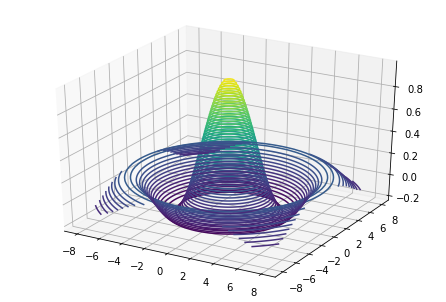

In [66]:
import matplotlib
from matplotlib import pyplot as plt
# 导入 3D 坐标轴支持
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# 设置 3D 坐标轴
ax = Axes3D(fig) 
# 根据网格点绘制 sinc 函数 3D 曲面
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()